In [ ]:
# Dataset https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [49]:
data = pd.read_csv("data/tweets.csv")
data.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1581816197435183104,1581737838650920960,2022-10-17 01:15:44 UTC,2022-10-17,01:15:44,0,1488398088251187201,cyranobtc,cyrano_de_btc,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DavidSacks', 'name': 'David ...",NaN,NaN,NaN,NaN
1,1581816197061832704,1581816197061832704,2022-10-17 01:15:44 UTC,2022-10-17,01:15:44,0,1539667168723214336,josemar72917006,Jose,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1581816188224479232,1581596792822542337,2022-10-17 01:15:42 UTC,2022-10-17,01:15:42,0,29256831,lowead,Matty,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'generic991', 'name': 'Eggboy...",NaN,NaN,NaN,NaN
3,1581816185716609024,1581504142031585280,2022-10-17 01:15:42 UTC,2022-10-17,01:15:42,0,1375634394493358081,cosmonautghost,GhostCosmonaut,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ardavish', 'name': '🇾🇪 🇵🇸 🇻🇪...",NaN,NaN,NaN,NaN
4,1581816180917968897,1581816180917968897,2022-10-17 01:15:40 UTC,2022-10-17,01:15:40,0,1511915181709803520,gatoradewussy8,zackfoxenjoyer,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [50]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
data_2 = data[["username", "tweet", "language"]]
data_2.head(5)

In [52]:
data_3.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [53]:
data_3["language"].value_counts()

pt    435
Name: language, dtype: int64

In [54]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('portuguese')
stopword= set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def trataTweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = [word for word in tweet.split(' ') if word not in stopword]
    tweet=" ".join(tweet)
    tweet = [stemmer.stem(word) for word in tweet.split(' ')]
    tweet=" ".join(tweet)
    return tweet
    

In [56]:
data_3["tweet"] = data_3["tweet"].apply(trataTweet)
data_3.head(5)

,username,tweet,language
30,luiz88s,demor fal sobr pedófil bolsonar fal sobr confu...,pt
50,laamaral,chin rúss pod lanc spac pearl harbor satélit a...,pt
57,bernardocrvg,rafacariok assim gent fal afeganistã irã aráb ...,pt
101,anjefama1rn,sfmor grac deus vc,pt
107,samulewski2k22,vendettaxk boechatvinicius diretofront russet ...,pt


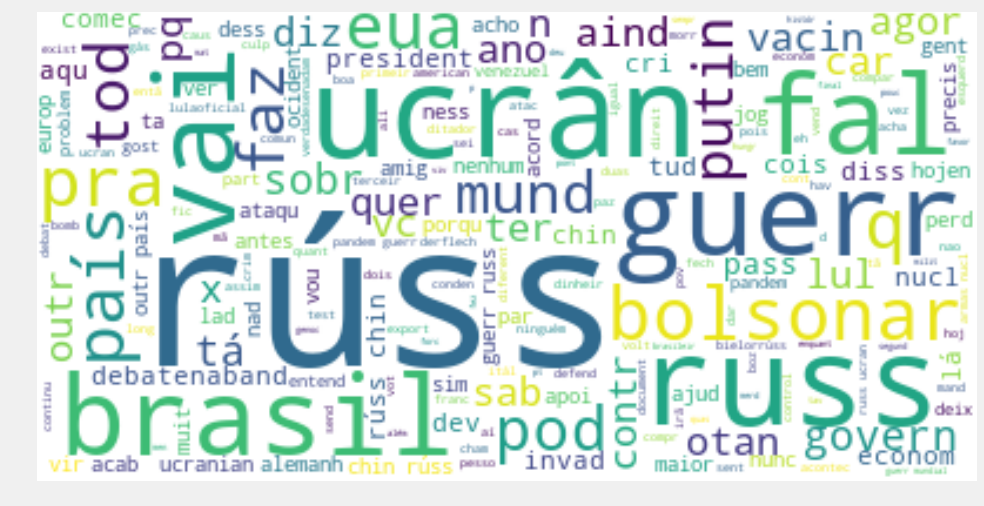

In [57]:
tweet = " ".join(i for i in data_3.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data_3["Positivo"] = [sentiments.polarity_scores(i)["pos"] for i in data_3["tweet"]]
data_3["Negativo"] = [sentiments.polarity_scores(i)["neg"] for i in data_3["tweet"]]
data_3["Neutro"] = [sentiments.polarity_scores(i)["neu"] for i in data_3["tweet"]]
data_3 = data_3[["tweet", "Positivo", "Negativo", "Neutro"]]
print(data_3.head(5))

                                                 tweet  Positivo  Negativo  \
30   demor fal sobr pedófil bolsonar fal sobr confu...       0.0       0.0   
50   chin rúss pod lanc spac pearl harbor satélit a...       0.0       0.0   
57   rafacariok assim gent fal afeganistã irã aráb ...       0.0       0.0   
101                                 sfmor grac deus vc       0.0       0.0   
107  vendettaxk boechatvinicius diretofront russet ...       0.0       0.0   

     Neutro  
30      1.0  
50      1.0  
57      1.0  
101     1.0  
107     1.0  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nicolas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


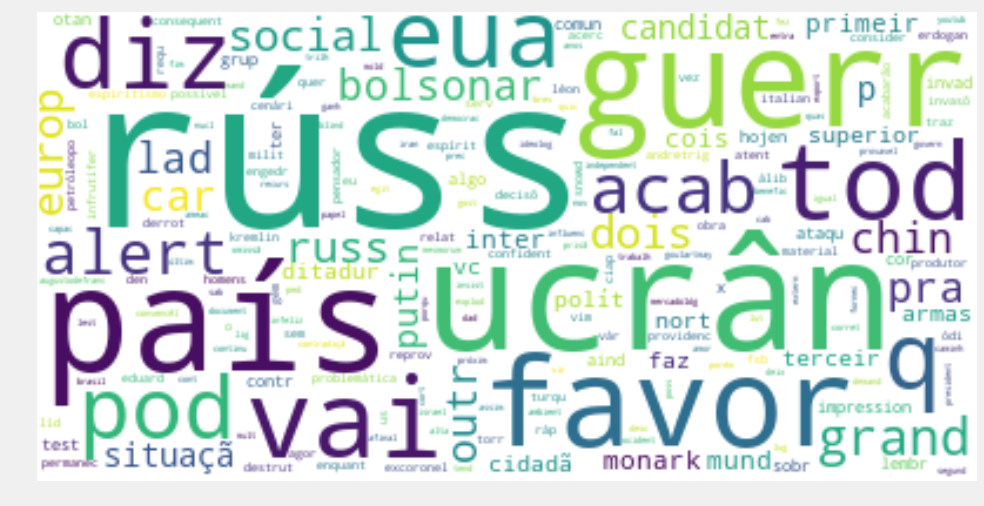

In [59]:
positive =' '.join([i for i in data_3['tweet'][data_3['Positivo'] > data_3["Negativo"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

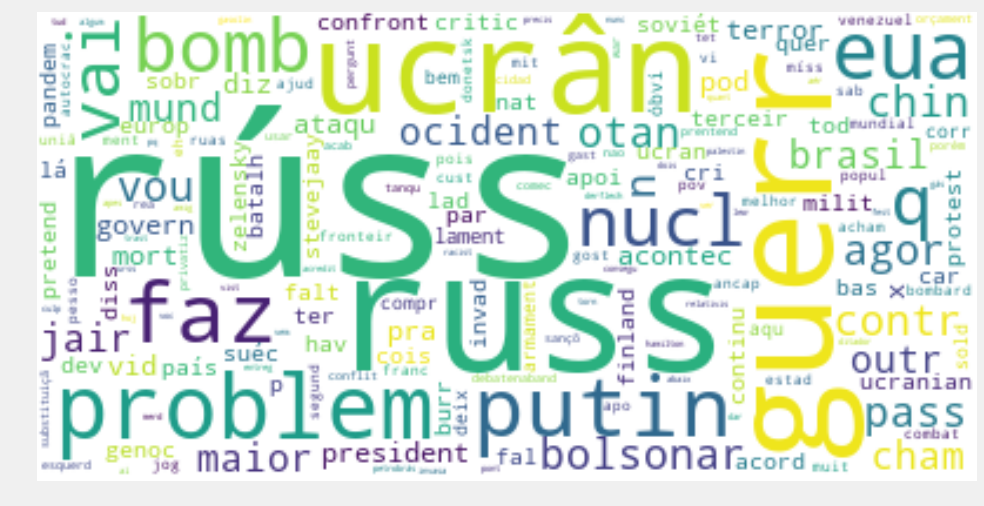

In [60]:
negative =' '.join([i for i in data_3['tweet'][data_3['Negativo'] > data_3["Positivo"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Inspirado-AMAN-KHARWAL-